In [1]:
!wget 'https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py'

--2022-11-13 10:38:26--  https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7219 (7.0K) [text/plain]
Saving to: ‘dcgan.py’

dcgan.py            100%[===================>]   7.05K  --.-KB/s    in 0s      

2022-11-13 10:38:27 (81.5 MB/s) - ‘dcgan.py’ saved [7219/7219]



In [2]:
# Needs matplotlib version 3.3.4
!pip install matplotlib==3.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 12.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/cifar10_models.zip'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import cifar10
import tensorflow as tf

from dcgan import DCGAN, Preprocessor

Load the fashion-mnist data set and preprocess images (scale and flatten)

In [7]:
model_path = None
dcgan = DCGAN(model_path=model_path, channels=3)

In [8]:
# load cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

dcgan.preprocessor.fit(X_train)
X_train = dcgan.preprocessor.transform(X_train)


Look at a sample of the original images

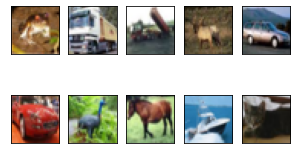

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(5, 3))
fig.patch.set_facecolor('white')
for indx, img in enumerate(X_train[:10]):
    i, j = indx // 5, indx % 5
    img = dcgan.preprocessor.inverse(img)
    img = img.astype(int)
    ax[i, j].imshow(img, cmap=plt.cm.binary)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

Instantiate and train our DCGAN

Epoch 1: 100%|##########| 500/500 [04:53<00:00,  1.70it/s]


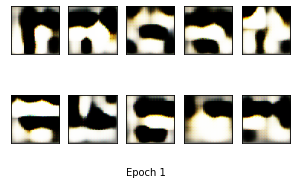

Epoch 4: 100%|##########| 500/500 [04:54<00:00,  1.70it/s]


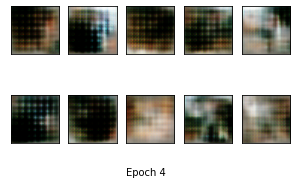

Epoch 8: 100%|##########| 500/500 [04:53<00:00,  1.70it/s]


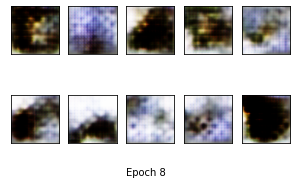

Epoch 12: 100%|##########| 500/500 [04:53<00:00,  1.70it/s]


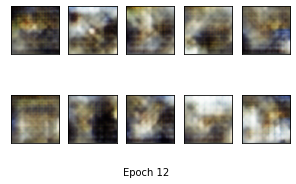

Epoch 16: 100%|##########| 500/500 [04:53<00:00,  1.71it/s]


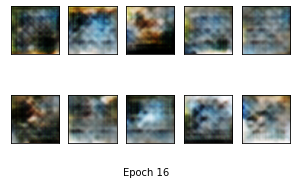

Epoch 20: 100%|##########| 500/500 [04:54<00:00,  1.70it/s]


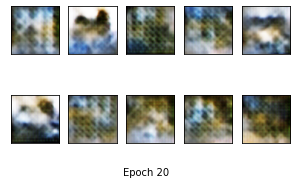

Epoch 24: 100%|##########| 500/500 [04:55<00:00,  1.69it/s]


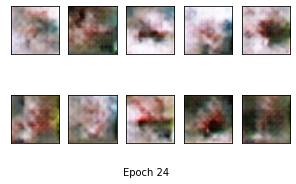

Epoch 28: 100%|##########| 500/500 [04:53<00:00,  1.70it/s]


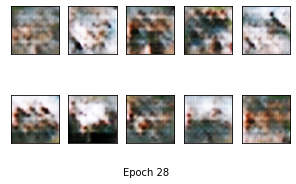

Epoch 32: 100%|##########| 500/500 [04:54<00:00,  1.70it/s]


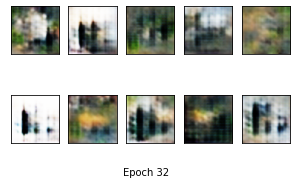

Epoch 36: 100%|##########| 500/500 [04:52<00:00,  1.71it/s]


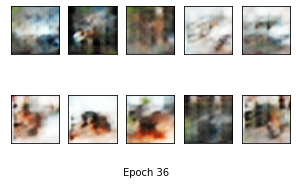

Epoch 40: 100%|##########| 500/500 [04:53<00:00,  1.71it/s]


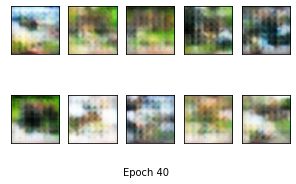

Total training time: 3:15:58


In [10]:
d_losses, g_losses = dcgan.train(X_train, 40, 100, verbose=4)

Plot the losses during training. The generator and discriminator losses should converge.

ValueError: ignored

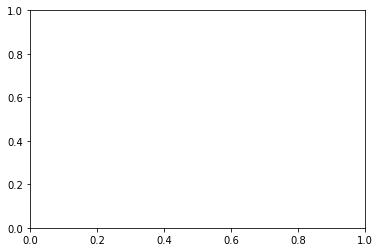

In [11]:
plt.plot(range(1, 26), d_losses, label='disc. loss')
plt.plot(range(1, 26), g_losses, label='gen. loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
dcgan.save_model('./content/drive/mydrive/cifar10_models')
